In [1]:
# Para visualización en notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 22
import seaborn as sns

# Números y Datos
import numpy as np
import pandas as pd

#version Paola 2.3
import networkx as nx

from glob import glob
from pathlib import Path

# TP2

In [174]:
filenames = glob('DataSujetos/*.csv')
df = pd.read_csv(filenames[0], header=-1)
n = df.shape[0]
df -= np.diag(np.ones(n))

print("Nro de archivos = " + str(len(filenames)))
subjects = set()
sleepStages = set()
for filename in filenames:
        subjects.add(filename[filename.index('_') + 1:-4])
        sleepStages.add(filename[filename.index('/') + 1: filename.index('_')])
print("Nro de sujetos = " + str(len(subjects)))
print("Nro de estadios = " + str(len(sleepStages)))

sleepStagesOrdered = ("W", "N1", "N2", "N3")

print("sleepStages = " + str(sleepStages))
print("sleepStagesOrdered = " + str(sleepStagesOrdered))

#es el limite inferior establecido en el paper
densidad_minima = 0.025
densidad_maxima = 1
count_densidad = 50

#Densidades de 0 a 1    
densities = np.linspace(densidad_minima,densidad_maxima,count_densidad)
#rango definido en el paper, 25 muestras espaciadas uniformemente
#densities = np.linspace(0.025,0.15,25)


Nro de archivos = 72
Nro de sujetos = 18
Nro de estadios = 4
sleepStages = {'N3', 'N1', 'N2', 'W'}
sleepStagesOrdered = ('W', 'N1', 'N2', 'N3')


In [175]:
#Toma un archivo csv con la matriz de input y devuelve una lista de grafos con la densidad de aristas correspondiente
def subjectmatrix2graphslist(filename, densities):
    correlation_matrix = pd.read_csv(filename, header=-1)
    n = correlation_matrix.shape[0]
    n2m1 = (n*n-1)
    correlation_matrix -= np.diag(np.ones(n))
    sorted_correlations = sorted(correlation_matrix.values.flatten(),reverse=True)
    
    Gs = []
    for d in densities:
        idx = int(d*n2m1)
        threshold = sorted_correlations[idx]
        Gs.append(nx.from_pandas_adjacency(correlation_matrix>=threshold))
        
    return Gs

def graphslistBySleepStage(sleepStage, densities):
    filenames = glob('DataSujetos/%s_*.csv' % sleepStage)
    graphs = {}
    for filename in filenames:
        Gs = subjectmatrix2graphslist(filename, densities)
        name = Path(filename).stem
        graphs[name] = Gs
    return graphs   

def buildFileName(stage, subject):
    return ("%s_%s" % (stage, subject))
    



In [176]:
graphsBySleepStage = {}

#se arma una mapa por estadio de sueño con los grafos de cada individuo
for sleepStage in sleepStages: 
    graphsBySleepStage[sleepStage] = graphslistBySleepStage(sleepStage, densities)

In [74]:
graphsBySleepStage.keys()

dict_keys(['N3', 'N1', 'N2', 'W'])

In [61]:
graphsBySleepStage['W']

{'W_suj11': [<networkx.classes.graph.Graph at 0x7f8f4023b438>,
 'W_suj16': [<networkx.classes.graph.Graph at 0x7f8f4023be48>,
 'W_suj8': [<networkx.classes.graph.Graph at 0x7f8f4023bf28>,
 'W_suj18': [<networkx.classes.graph.Graph at 0x7f8f4023b978>,
 'W_suj7': [<networkx.classes.graph.Graph at 0x7f8f4023b048>,
 'W_suj1': [<networkx.classes.graph.Graph at 0x7f8f4023b2e8>,
 'W_suj15': [<networkx.classes.graph.Graph at 0x7f8f4023ba58>,
 'W_suj4': [<networkx.classes.graph.Graph at 0x7f8f4023beb8>,
 'W_suj3': [<networkx.classes.graph.Graph at 0x7f8f4023b6d8>,
 'W_suj5': [<networkx.classes.graph.Graph at 0x7f8f4023ba20>,
 'W_suj10': [<networkx.classes.graph.Graph at 0x7f8f3f1b1ac8>,
 'W_suj14': [<networkx.classes.graph.Graph at 0x7f8f3f1b19b0>,
 'W_suj12': [<networkx.classes.graph.Graph at 0x7f8f3f1b1dd8>,
 'W_suj2': [<networkx.classes.graph.Graph at 0x7f8f3f1b1f28>,
 'W_suj6': [<networkx.classes.graph.Graph at 0x7f8f3f1b1278>,
 'W_suj17': [<networkx.classes.graph.Graph at 0x7f8f3f1b1f60>,


## Tarea 1: Visualización



In [177]:
#Funciones para calcular y dibujar los graficos por estadio de sueño
#calcular medida
def calculateMeasure(graphs, calculateMeasureByGraph):
    value = []
    for name, Gs in graphs.items():
        value_ =  [calculateMeasureByGraph(G) for G in Gs]
        value.append(value_)
    value = np.vstack(value)
    return value


#Dibujar graficos por estadio
def plotGraphMeasureBySleepStage(xlabel,ylabel, graphsBySleepStage, densities, calculateMeasureByGraph):
    plt.figure(figsize=(20,10))

    for i, sleepStage in enumerate(sleepStagesOrdered):
        print("sleepStage = " + sleepStage)
        measure = calculateMeasure(graphsBySleepStage[sleepStage], calculateMeasureByGraph)
        plt.subplot(2,2,i+1)
        plt.plot(densities, measure.T);
        if (i != 0 and i != 1):
            plt.xlabel(xlabel)
        plt.ylabel(ylabel);
        plt.title(sleepStage)

### Medida de Centralidad 

#### Grado

sleepStage = W
sleepStage = N1
sleepStage = N2
sleepStage = N3


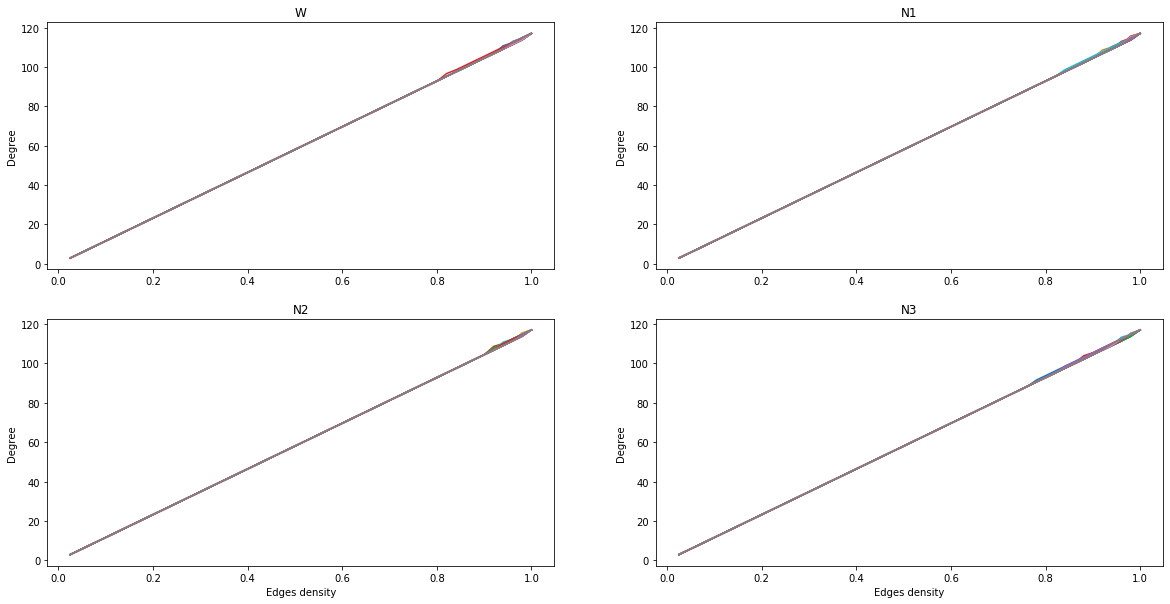

In [178]:
# Se grafica el grado medio en función de la densidad de links
# Esto no tiene mucha gracia porque el grado medio va a correlacionar con la densidad de links,
def calculateDegree(graph):
    return np.mean([v for n,v in graph.degree])

plotGraphMeasureBySleepStage('Edges density', 'Degree', graphsBySleepStage, densities, calculateDegree)    


#### Diámetro

sleepStage = W
sleepStage = N1
sleepStage = N2
sleepStage = N3


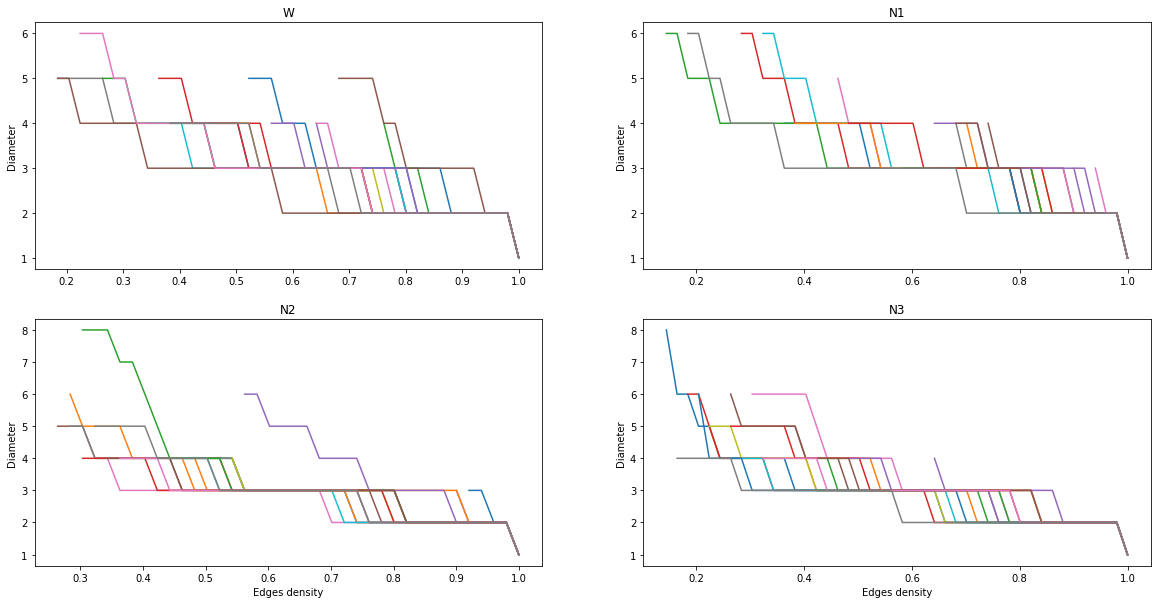

In [179]:
#El diametro es el maximo de los caminos mínimo entre los nodos
def calculateDiameterIfConnected(G):
     if (nx.is_connected(G)):
            return nx.diameter(G)
     return None

plotGraphMeasureBySleepStage('Edges density', 'Diameter', graphsBySleepStage, densities, calculateDiameterIfConnected)    



Se hizo una corrida para densidades hasta 0.15 y se obtuvo que el diametro se mantuvo constante en los estadios N1 (diametro = 6) y N3 (diametro = 8) para un único sujeto.  El rango de densidades vario de [0.14, 0.15] y [0.134, 0.15]

#### Camino medio
A small world network is characterized by a small average shortest path length, and a large clustering coefficient.
Como la mayoría de los grafos son inconexos se calcula el promedio de la eficiencia

sleepStage = W
sleepStage = N1
sleepStage = N2
sleepStage = N3


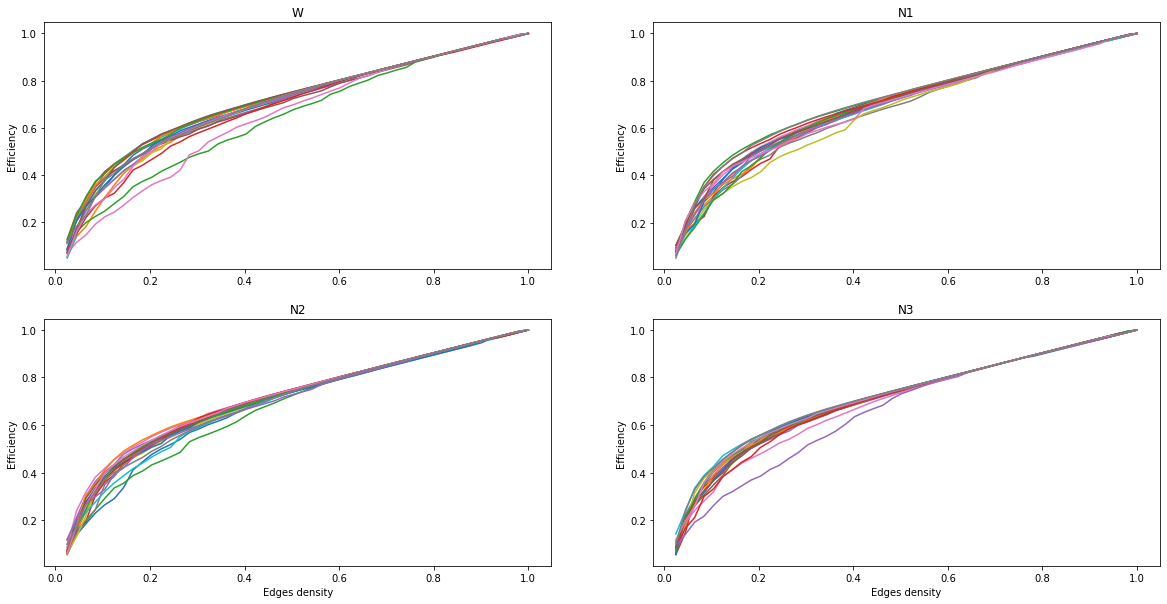

In [180]:
def calculateGlobalEfficiency(G):
    return nx.global_efficiency(G)

plotGraphMeasureBySleepStage('Edges density', 'Efficiency', graphsBySleepStage, densities, calculateGlobalEfficiency)    


#### Closeness Centrality

sleepStage = W
sleepStage = N1
sleepStage = N2
sleepStage = N3


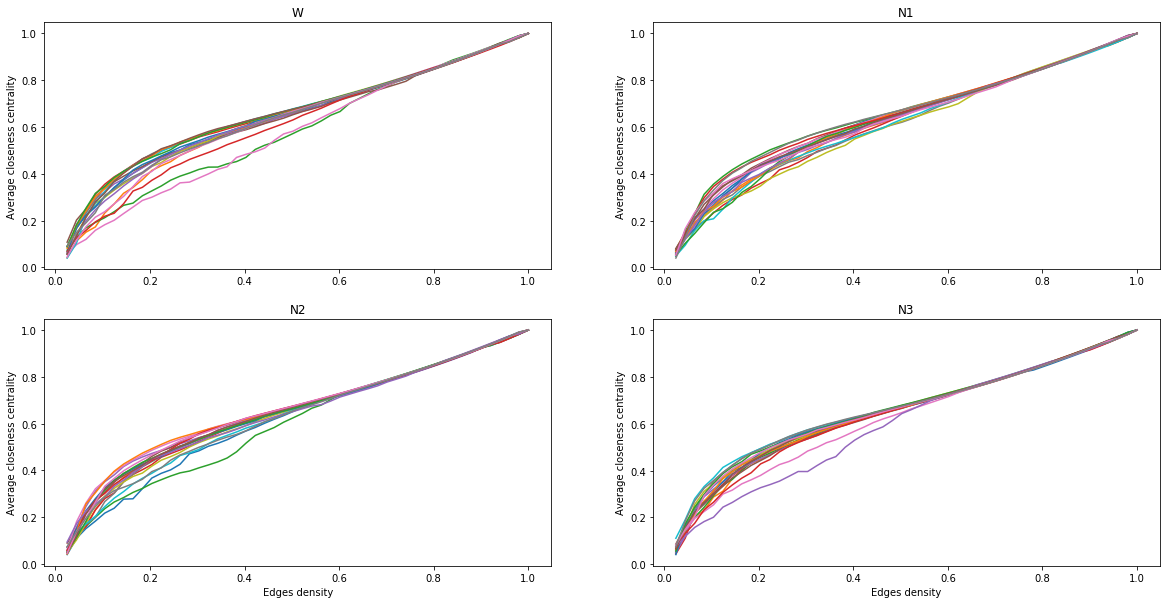

In [181]:
def calculateAvgClosenessCentrality(G):
    return np.mean([v for n, v in dict(nx.closeness_centrality(G)).items()]) 

plotGraphMeasureBySleepStage('Edges density', 'Average closeness centrality', graphsBySleepStage, densities, calculateAvgClosenessCentrality)    


#### Coeficiente de clustering

In [ ]:
plotGraphMeasureBySleepStage('Edges density', 'Average clustering', graphsBySleepStage, densities, nx.average_clustering)    
    

sleepStage = W
sleepStage = N1
sleepStage = N2
sleepStage = N3


The more densely interconnected the neighborhood of node i, the higher is its local clustering coefficient.

Fuente: http://networksciencebook.com/chapter/2#clustering

#### Visualizar el grafo no pesado para distintos valores de δ que resulten interesantes. 

En el paper utiliza el rango [0.025, 0.15] con step de 0.005. Se eligió el limite inferior en 0.025 para no trabajar con redes muy fragmentadas.  En el otro las redes extremas, muy densamente conectadas, tienen modularidades comparables a las de las redes aleatorias (aproximadamente Q≤ 0.3), lo que dificulta su descomposición en módulos funcionales claramente definidos. (Reichardt y Bornholdt, 2006)

Se elige la densidad 0.15. El límite superior definido en el paper para grafic

In [ ]:
#definicion de funciones

#Se busca el sujeto dentro de un estadio con el grafo conexo y la densidad con menor densidad que se lo logro
def findMinimumDensityByStage(stage):
    subject = None
    density = None
    index = None
    for key in graphsBySleepStage[stage]:
        for j in range(len(graphsBySleepStage[stage][key])):
            if (index != None and index < j):
                break

            if (nx.is_connected(graphsBySleepStage[stage][key][j])):
                subject = key[key.index('_') + 1: len(key)]
                density = densities[j]
                index = j
                break;
    return (stage, subject, index, density)

#se grafican los 4 grafos para una densidad dad
def plotGraphs(interestingDensity):
    fig = plt.figure(figsize=(24,8))
    fig.suptitle(('Estadío %s Sujeto %s Densidad %s' % (interestingDensity[0], interestingDensity[1], interestingDensity[3])), fontsize=16)
    for i, sleepStage in enumerate(sleepStagesOrdered):
        graph_selected = graphsBySleepStage[sleepStage][buildFileName(sleepStage, interestingDensity[1])][interestingDensity[2]]
        plt.subplot(141 + i)
        title = '%s Conectado %s - %s' % (sleepStage, nx.is_connected(graph_selected), list(nx.isolates(graph_selected)) )
        plt.title(title)      
        #layout=nx.circular_layout(graph)
        layout=nx.fruchterman_reingold_layout(graph_selected)
        nx.draw(graph_selected, layout, with_labels=True, font_weight='bold')


In [ ]:
#Esto nos devuelve posibles sujetos candidatos para los que graficar grafos conexos en al menos uno de sus estadios
posibleInterestingDensities = {}
for i, sleepStage in enumerate(sleepStagesOrdered):
        posibleInterestingDensities[sleepStage] = findMinimumDensityByStage(sleepStage)
        print(sleepStage)
        print(posibleInterestingDensities[sleepStage])
        

In [ ]:
for i, sleepStage in enumerate(sleepStagesOrdered):
    plotGraphs(posibleInterestingDensities[sleepStage])

# Tarea 2: Comunidades

In [11]:
from community import community_louvain

In [12]:
def calculateMeanMeasure(graphs, calculateMeasureByGraph):
    values = []
    for name, Gs in graphs.items():
        value = [calculateMeasureByGraph(G) for G in Gs]
        values.append(value)
    values = np.vstack(values)
    return (values.mean(0), values.std(0))

def plotMeanGraphMeasureBySleepStage(xlabel, ylabel, graphsBySleepStage, densities,
                                     calculateMeasureByGraph, showStd = True):
    plt.figure(figsize=(20,10))

    for i, sleepStage in enumerate(sleepStagesOrdered):
        print('sleepStage = ' + sleepStage)
        measure = calculateMeanMeasure(graphsBySleepStage[sleepStage], calculateMeasureByGraph)
        plt.subplot(2,2,i+1)
        if (showStd):
            plt.fill_between(densities, measure[0] - measure[1], measure[0] + measure[1], alpha = 0.5);
        plt.plot(densities, measure[0]);
        if (i != 0 and i != 1):
            plt.xlabel(xlabel)
        plt.ylabel(ylabel);
        plt.title(sleepStage)
        
def calculateModularityCoefficient(graph):
    if graph.number_of_edges() == 0:
        return 0
    modulos = community_louvain.best_partition(graph)
    return community_louvain.modularity(modulos, graph)

def calculateNumberOfModules(graph):
    if graph.number_of_edges() == 0:
        return 0
    modulos = community_louvain.best_partition(graph)
    return len(set(modulos.values()))

sleepStage = W
sleepStage = N1
sleepStage = N2
sleepStage = N3


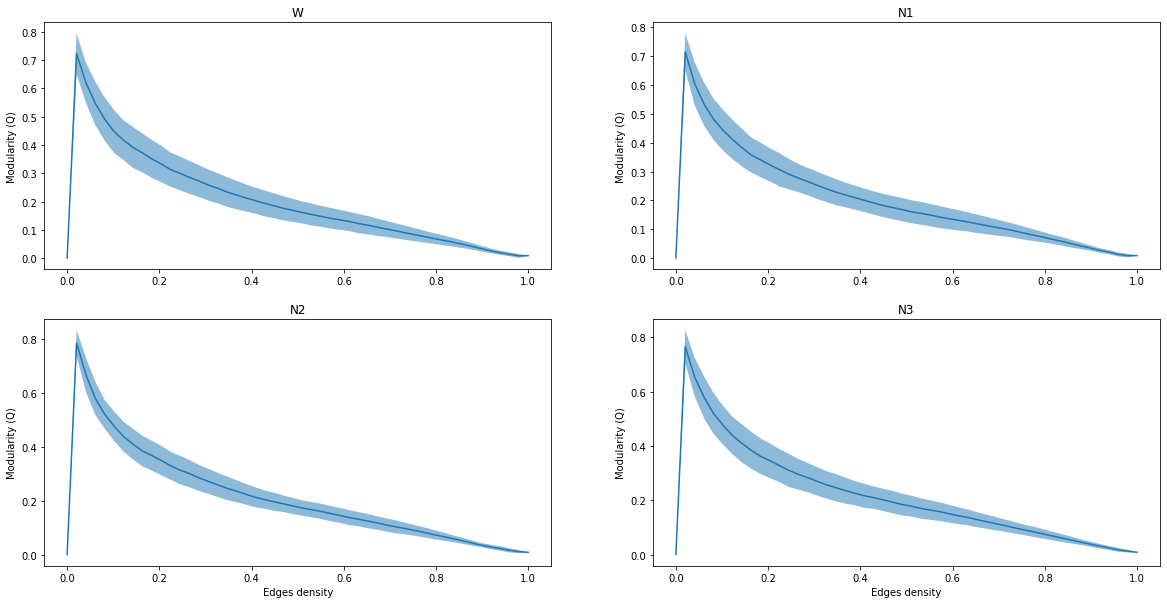

In [13]:
# Se grafica el coeficiente de modularidad (Q) en función de las densidades
plotMeanGraphMeasureBySleepStage('Edges density', 'Modularity (Q)',
                             graphsBySleepStage, densities, calculateModularityCoefficient)


sleepStage = W
sleepStage = N1
sleepStage = N2
sleepStage = N3


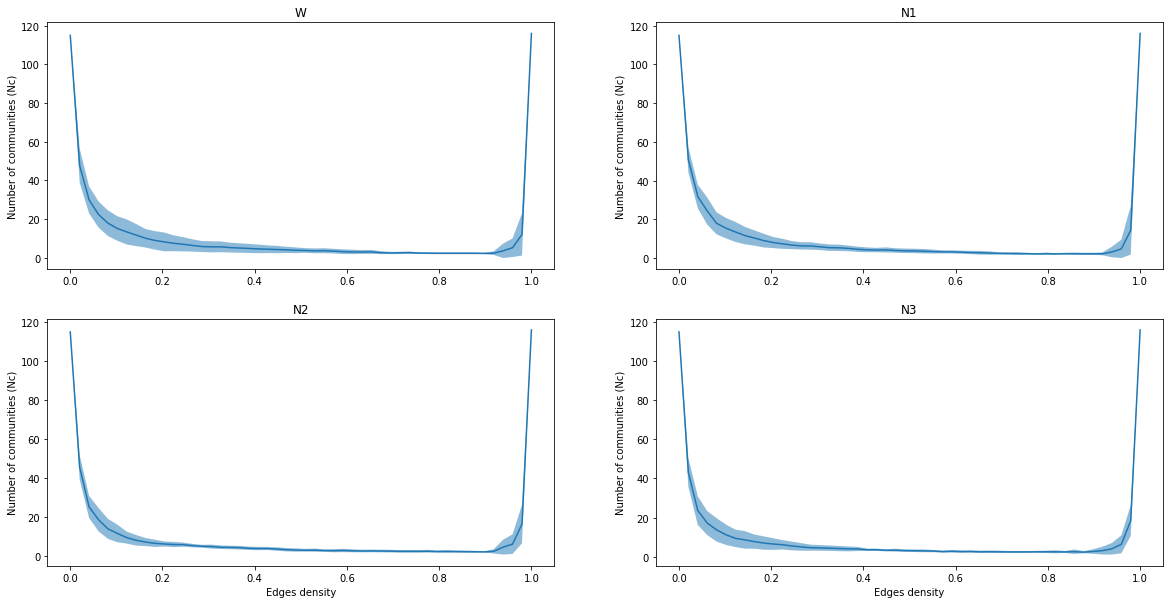

In [14]:
# Se grafica el número de comunidades (Nc) en función de las densidades
plotMeanGraphMeasureBySleepStage('Edges density', 'Number of communities (Nc)',
                             graphsBySleepStage, densities, calculateNumberOfModules)

In [15]:
# Se construyen redes random que preserven la distribución de grados de los nodos
def generateRandomGraphs(graphsBySleepStage):
    randomGraphsByStageAndSubject = {}
    for stageName, stageData in graphsBySleepStage.items():
        subjects = {}
        for subjectName, graphs in stageData.items():
            randomGraphs = []
            for i, graph in enumerate(graphs):
                g = nx.expected_degree_graph([deg for (_, deg) in graph.degree()], selfloops=False)
                randomGraphs.append(g)
            subjects[subjectName] = randomGraphs
        randomGraphsByStageAndSubject[stageName] = subjects
    return randomGraphsByStageAndSubject

randomGraphs = generateRandomGraphs(graphsBySleepStage)

In [16]:
# Se construyen redes random que preserven la cantidad de nodos y la cantidad de links
#def generateRandomGraphs(graphsBySleepStage):
#    randomGraphsByStageAndSubject = {}
#    for stageName, stageData in graphsBySleepStage.items():
#        print('stageName: ' + stageName)
#        subjects = {}
#        for subjectName, graphs in stageData.items():
#            print('subjectName: ' + subjectName)
#            randomGraphs = []
#            for i, graph in enumerate(graphs):
#                numberOfNodes = graph.number_of_nodes()
#                numberOfEdges = graph.number_of_edges()
#                g = nx.gnm_random_graph(numberOfNodes, numberOfEdges)
#                randomGraphs.append(g)
#            subjects[subjectName] = randomGraphs
#        randomGraphsByStageAndSubject[stageName] = subjects
#    return randomGraphsByStageAndSubject

#randomGraphs = generateRandomGraphs(graphsBySleepStage)

In [17]:
randomGraphs['N1']['N1_suj11'][40].degree

DegreeView({0: 103, 1: 100, 2: 100, 3: 105, 4: 97, 5: 97, 6: 104, 7: 105, 8: 101, 9: 98, 10: 102, 11: 104, 12: 105, 13: 102, 14: 101, 15: 101, 16: 107, 17: 105, 18: 105, 19: 107, 20: 12, 21: 5, 22: 100, 23: 107, 24: 103, 25: 107, 26: 104, 27: 92, 28: 106, 29: 107, 30: 84, 31: 70, 32: 107, 33: 108, 34: 102, 35: 99, 36: 100, 37: 97, 38: 101, 39: 99, 40: 98, 41: 91, 42: 100, 43: 100, 44: 102, 45: 98, 46: 99, 47: 103, 48: 100, 49: 95, 50: 99, 51: 97, 52: 103, 53: 100, 54: 103, 55: 105, 56: 103, 57: 105, 58: 101, 59: 101, 60: 99, 61: 94, 62: 102, 63: 97, 64: 95, 65: 102, 66: 100, 67: 101, 68: 106, 69: 105, 70: 75, 71: 68, 72: 25, 73: 16, 74: 31, 75: 45, 76: 35, 77: 43, 78: 108, 79: 109, 80: 101, 81: 101, 82: 97, 83: 102, 84: 98, 85: 98, 86: 90, 87: 89, 88: 103, 89: 102, 90: 108, 91: 104, 92: 94, 93: 105, 94: 99, 95: 89, 96: 103, 97: 102, 98: 103, 99: 99, 100: 105, 101: 105, 102: 107, 103: 105, 104: 76, 105: 107, 106: 103, 107: 104, 108: 41, 109: 100, 110: 103, 111: 106, 112: 104, 113: 106, 

In [18]:
graphsBySleepStage['N1']['N1_suj11'][40].degree

DegreeView({0: 106, 1: 105, 2: 104, 3: 107, 4: 100, 5: 98, 6: 104, 7: 105, 8: 103, 9: 102, 10: 100, 11: 107, 12: 101, 13: 106, 14: 102, 15: 106, 16: 110, 17: 109, 18: 106, 19: 107, 20: 9, 21: 6, 22: 107, 23: 106, 24: 109, 25: 104, 26: 100, 27: 98, 28: 111, 29: 112, 30: 90, 31: 81, 32: 107, 33: 109, 34: 101, 35: 97, 36: 97, 37: 98, 38: 98, 39: 97, 40: 97, 41: 93, 42: 103, 43: 102, 44: 100, 45: 101, 46: 100, 47: 102, 48: 102, 49: 102, 50: 101, 51: 99, 52: 100, 53: 99, 54: 100, 55: 101, 56: 102, 57: 102, 58: 98, 59: 98, 60: 97, 61: 94, 62: 103, 63: 100, 64: 99, 65: 100, 66: 100, 67: 103, 68: 106, 69: 103, 70: 61, 71: 64, 72: 26, 73: 16, 74: 30, 75: 48, 76: 39, 77: 40, 78: 109, 79: 109, 80: 103, 81: 103, 82: 99, 83: 103, 84: 98, 85: 103, 86: 81, 87: 92, 88: 98, 89: 100, 90: 110, 91: 107, 92: 97, 93: 107, 94: 100, 95: 80, 96: 102, 97: 98, 98: 107, 99: 106, 100: 108, 101: 108, 102: 109, 103: 111, 104: 76, 105: 110, 106: 108, 107: 107, 108: 30, 109: 102, 110: 105, 111: 105, 112: 110, 113: 104

In [19]:
# Hay 30 grafos que tienen cero links
count = 0
for stageName, stageData in randomGraphs.items():
    for subjectName, subjectData in stageData.items():
        for i, graph in enumerate(subjectData):
            links = graph.number_of_edges()
            if links == 0:
                count += 1
                print(subjectName + ", pos = " + str(i) + " has no links")
print(count)

N2_suj1, pos = 0 has no links
N2_suj5, pos = 0 has no links
N2_suj3, pos = 0 has no links
N2_suj14, pos = 0 has no links
N2_suj9, pos = 0 has no links
N2_suj18, pos = 0 has no links
N2_suj10, pos = 0 has no links
N1_suj18, pos = 0 has no links
N1_suj7, pos = 0 has no links
N1_suj8, pos = 0 has no links
N1_suj9, pos = 0 has no links
N1_suj13, pos = 0 has no links
N3_suj8, pos = 0 has no links
N3_suj10, pos = 0 has no links
N3_suj13, pos = 0 has no links
N3_suj12, pos = 0 has no links
N3_suj18, pos = 0 has no links
N3_suj14, pos = 0 has no links
N3_suj6, pos = 0 has no links
N3_suj16, pos = 0 has no links
N3_suj4, pos = 0 has no links
N3_suj5, pos = 0 has no links
N3_suj3, pos = 0 has no links
W_suj6, pos = 0 has no links
W_suj13, pos = 0 has no links
W_suj11, pos = 0 has no links
W_suj5, pos = 0 has no links
W_suj17, pos = 0 has no links
W_suj18, pos = 0 has no links
W_suj2, pos = 0 has no links
W_suj12, pos = 0 has no links
W_suj1, pos = 0 has no links
W_suj9, pos = 0 has no links
W_su

In [20]:
# Todos los grafos tienen links
for stageName, stageData in graphsBySleepStage.items():
    for subjectName, subjectData in stageData.items():
        for i, graph in enumerate(subjectData):
            links = graph.number_of_edges()
            if links == 0:
                print(subjectName + ", pos = " + str(i) + " has no links")

In [21]:
# Se compara los distintos Q con los Q de una red random que preserva la distribución de grados de los nodos
def plotMeanTwoGraphFamilies(xlabel, ylabel, graph1, graph2, densities,
                             calculateMeasureByGraph, labelGraph1, labelGraph2):
    plt.figure(figsize=(20,10))

    for i, sleepStage in enumerate(sleepStagesOrdered):
        print("sleepStage = " + sleepStage)
        measureGraph1 = calculateMeanMeasure(graph1[sleepStage], calculateMeasureByGraph)
        measureGraph2 = calculateMeanMeasure(graph2[sleepStage], calculateMeasureByGraph)
        plt.subplot(2,2,i+1)
            
        plt.plot(densities, measureGraph1[0], label = labelGraph1);
        plt.plot(densities, measureGraph2[0], label = labelGraph2);
        
        if (i != 0 and i != 1):
            plt.xlabel(xlabel)
            
        plt.legend()
        plt.ylabel(ylabel);
        plt.title(sleepStage)

sleepStage = W
sleepStage = N1
sleepStage = N2
sleepStage = N3


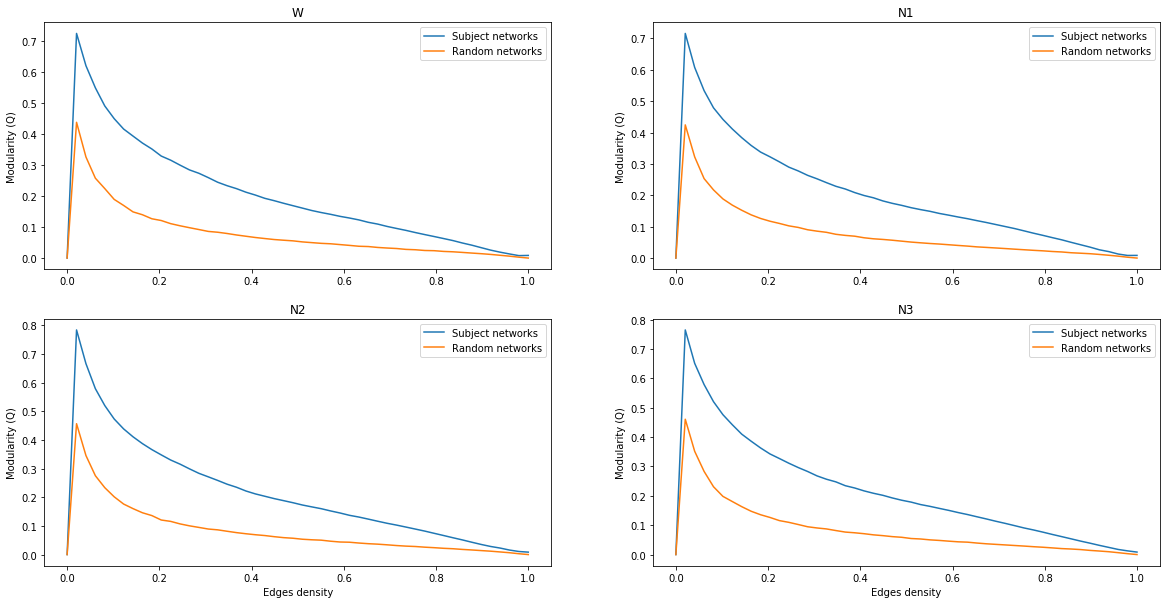

In [22]:
plotMeanTwoGraphFamilies('Edges density', 'Modularity (Q)',
                         graphsBySleepStage, randomGraphs, densities, calculateModularityCoefficient,
                         'Subject networks', 'Random networks')

sleepStage = W
sleepStage = N1
sleepStage = N2
sleepStage = N3


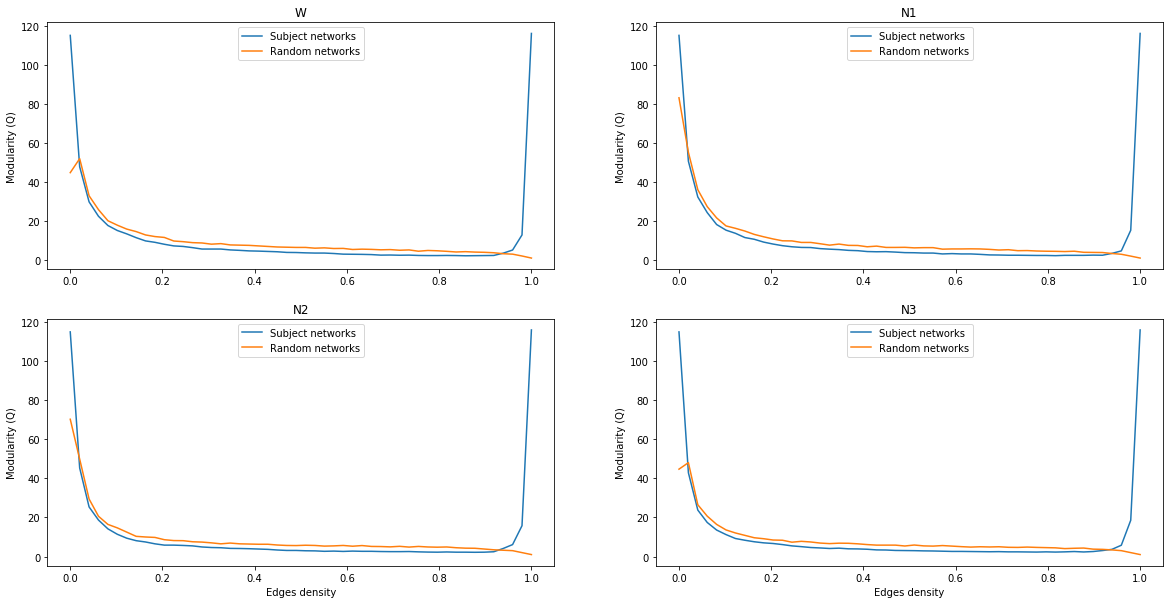

In [23]:
plotMeanTwoGraphFamilies('Edges density', 'Modularity (Q)',
                         graphsBySleepStage, randomGraphs, densities, calculateNumberOfModules,
                         'Subject networks', 'Random networks')

# Tarea 3: Estadística

In [24]:
# Repetir las curvas de modularidad (Q) y número de comunidades (Nc) para cada sujeto y estadío del sueño,
# en función de la densidad, y comparar cada estadío N1, N2 y N3, con el estadío despierto W.
# Para cada valor de densidad incluir una noción de significancia entre estadíos del sueño.

def plotMeanWakeVsNxStages(xlabel, ylabel, graphsBySleepStage, densities,
                             calculateMeasureByGraph):
    plt.figure(figsize=(20,10))

    wakeStage = sleepStagesOrdered[0]
    nxStages = (sleepStagesOrdered[1], sleepStagesOrdered[2], sleepStagesOrdered[3])
    
    print("sleepStage = " + wakeStage)
    measureWakeStage = calculateMeanMeasure(graphsBySleepStage[wakeStage], calculateMeasureByGraph)
    
    for i, sleepStage in enumerate(nxStages):
        print("sleepStage = " + sleepStage)
        measure = calculateMeanMeasure(graphsBySleepStage[sleepStage], calculateMeasureByGraph)
        plt.subplot(2,2,i+1)
            
        plt.plot(densities, measure[0], label = sleepStage);
        plt.plot(densities, measureWakeStage[0], label = wakeStage);
        
        if (i != 0 and i != 1):
            plt.xlabel(xlabel)
            
        plt.legend()
        plt.ylabel(ylabel);
        plt.title(sleepStage)


sleepStage = W
sleepStage = N1
sleepStage = N2
sleepStage = N3


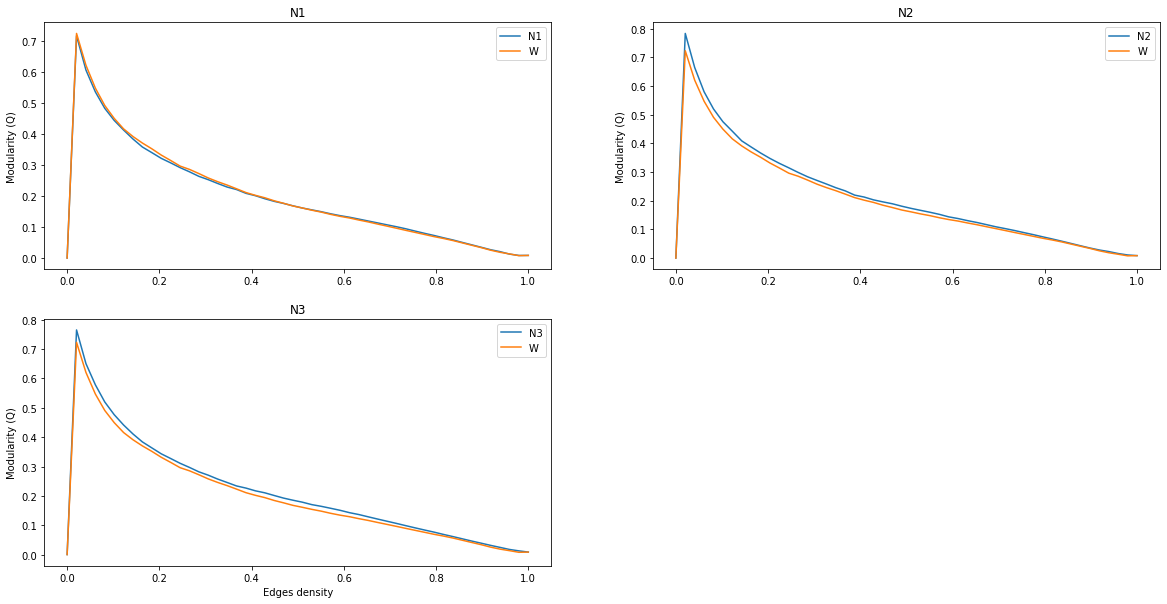

In [25]:
plotMeanWakeVsNxStages('Edges density', 'Modularity (Q)',
                       graphsBySleepStage, densities, calculateModularityCoefficient)

sleepStage = W
sleepStage = N1
sleepStage = N2
sleepStage = N3


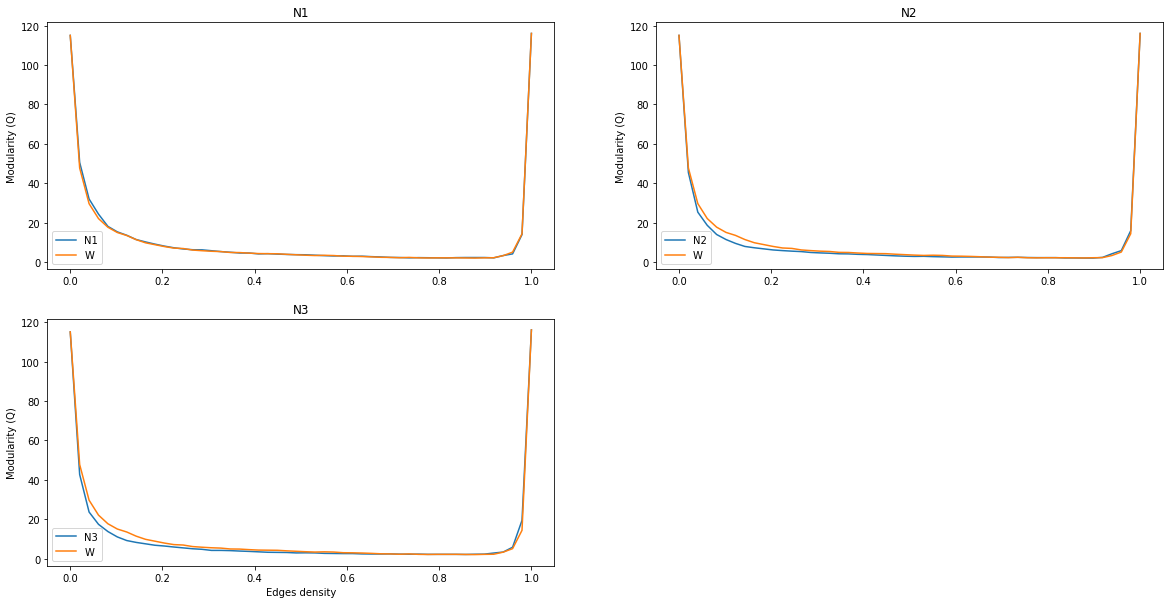

In [26]:
plotMeanWakeVsNxStages('Edges density', 'Modularity (Q)',
                       graphsBySleepStage, densities, calculateNumberOfModules)

In [27]:
# PENDIENTE: Para cada valor de densidad incluir una noción de significancia entre estadíos del sueño.

# Tarea 4: Diferencias en la membresía para los diferentes estadíos

Para identificar diferencias significativas globales en la membresía de los nodos entre los distintos estadíos del sueño (N1, N2 y N3), con el estadio despierto (W) se propone seguir el procedimiento propuesto por Alexander-Bloch y colaboradores [Alexander-Bloch et al., 2012].

Para cada par NX y W se calcula la similaridad entre grupos a partir de Índice de Rand ajustado (adjusted-for-chance Rand index), y el valor promedio se compara con Np permutaciones de las etiquetas de comunidades para cada estadío. El p-valor se obtiene dividiendo el número de veces en que una permutación supera el valor promedio para los datos no permutados por el número total de permutaciones (Np).

In [28]:
from sklearn.metrics import adjusted_rand_score

In [29]:
number_of_permutations = 1000
wakeStage = sleepStagesOrdered[0]
nxStages = (sleepStagesOrdered[1], sleepStagesOrdered[2], sleepStagesOrdered[3])

def calculateWithinGroupSimilarity(modules_subjects):
    rand_indexes = []
    cant_subjects = len(modules_subjects)
    for i in range(0, cant_subjects - 1):
        for j in range(i + 1, cant_subjects):
            rand_index = adjusted_rand_score(modules_subjects[i], modules_subjects[j])
            rand_indexes.append(rand_index)
    rand_indexes = np.vstack(rand_indexes)
    return rand_indexes.mean()

def buildModulesSubjects(graphs_subjects):
    modules_subjects = []
    for graph in graphs_subjects:
        modules = community_louvain.best_partition(graph)
        values = [v for n,v in modules.items()]
        modules_subjects.append(values)
    return modules_subjects

def getGraphsSubjects(stage, i, graphs):
    graphs_subjects = []
    stageData = graphs[stage]
    for subjectName, graphs in sorted(stageData.items()):
        graphs_subjects.append(graphs[i])
    return graphs_subjects


def rand_value(i, graphsBySleepStage):    
    
    # Se construye un dictionary de similatities por sleepStages
    similarities = {}
    for stage in sleepStages:
        graphs_subjects = getGraphsSubjects(stage, i, graphsBySleepStage)
        modules_subjects = buildModulesSubjects(graphs_subjects)
        within_group_similarity = calculateWithinGroupSimilarity(modules_subjects)
        similarities[stage] = within_group_similarity
    
    # Se promedian cada uno de los nxStages con wakeStage
    nxStagesSimilarities = {}
    for nx in nxStages:
        sim = np.vstack([similarities[wakeStage], similarities[nx]])
        nxStagesSimilarities[nx] = (sim.mean(), sim.std())
        
    return nxStagesSimilarities
    
    

density: 0.0
density: 0.02040816326530612
density: 0.04081632653061224
density: 0.061224489795918366
density: 0.08163265306122448
density: 0.1020408163265306
density: 0.12244897959183673
density: 0.14285714285714285
density: 0.16326530612244897
density: 0.18367346938775508
density: 0.2040816326530612
density: 0.22448979591836732
density: 0.24489795918367346
density: 0.26530612244897955
density: 0.2857142857142857
density: 0.3061224489795918
density: 0.32653061224489793
density: 0.3469387755102041
density: 0.36734693877551017
density: 0.3877551020408163
density: 0.4081632653061224
density: 0.42857142857142855
density: 0.44897959183673464
density: 0.4693877551020408
density: 0.4897959183673469
density: 0.5102040816326531
density: 0.5306122448979591
density: 0.5510204081632653
density: 0.5714285714285714
density: 0.5918367346938775
density: 0.6122448979591836
density: 0.6326530612244897
density: 0.6530612244897959
density: 0.673469387755102
density: 0.6938775510204082
density: 0.714285714

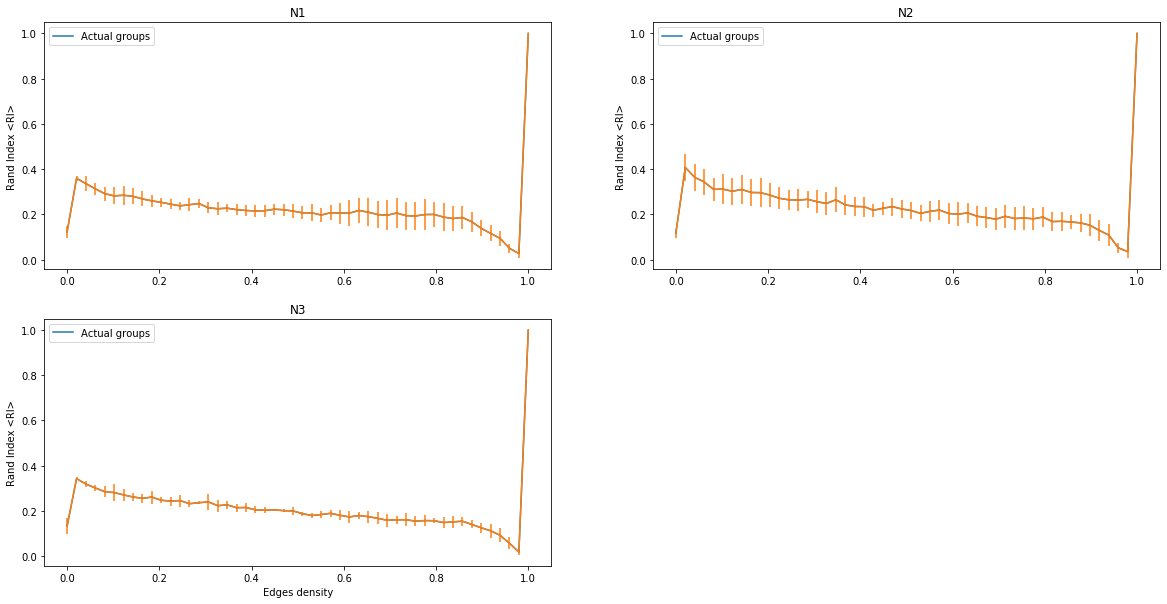

In [30]:
plt.figure(figsize=(20,10))

# Actual groups
n1ag_means = []
n2ag_means = []
n3ag_means = []
n1ag_stds = []
n2ag_stds = []
n3ag_stds = []

for i, density in enumerate(densities):
    print("density: " + str(density))
    rands = rand_value(i, graphsBySleepStage)
    n1ag_means.append(rands[nxStages[0]][0])
    n2ag_means.append(rands[nxStages[1]][0])
    n3ag_means.append(rands[nxStages[2]][0])
    n1ag_stds.append(rands[nxStages[0]][1])
    n2ag_stds.append(rands[nxStages[1]][1])
    n3ag_stds.append(rands[nxStages[2]][1])    

plt.subplot(2,2,1)
plt.plot(densities, n1ag_means, label = "Actual groups")
plt.errorbar(densities, n1ag_means, n1ag_stds)
plt.title(nxStages[0])
plt.legend()
plt.ylabel('Rand Index <RI>');

plt.subplot(2,2,2)
plt.plot(densities, n2ag_means, label = "Actual groups")
plt.errorbar(densities, n2ag_means, n2ag_stds)
plt.title(nxStages[1])
plt.legend()
plt.ylabel('Rand Index <RI>');

plt.subplot(2,2,3)
plt.plot(densities, n3ag_means, label = "Actual groups")
plt.errorbar(densities, n3ag_means, n3ag_stds)
plt.xlabel('Edges density')
plt.title(nxStages[2])
plt.legend()
plt.ylabel('Rand Index <RI>');